In [1]:
# Muhammed Pesen EEE 61200004 HW2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import copy
import math

In [2]:
from sklearn import datasets

diabetes = datasets.load_diabetes(as_frame=True)
print(type(diabetes))
diabetes["frame"]
# We can see that all the features are scaled so we don't have to do scaling

<class 'sklearn.utils._bunch.Bunch'>


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


<AxesSubplot: >

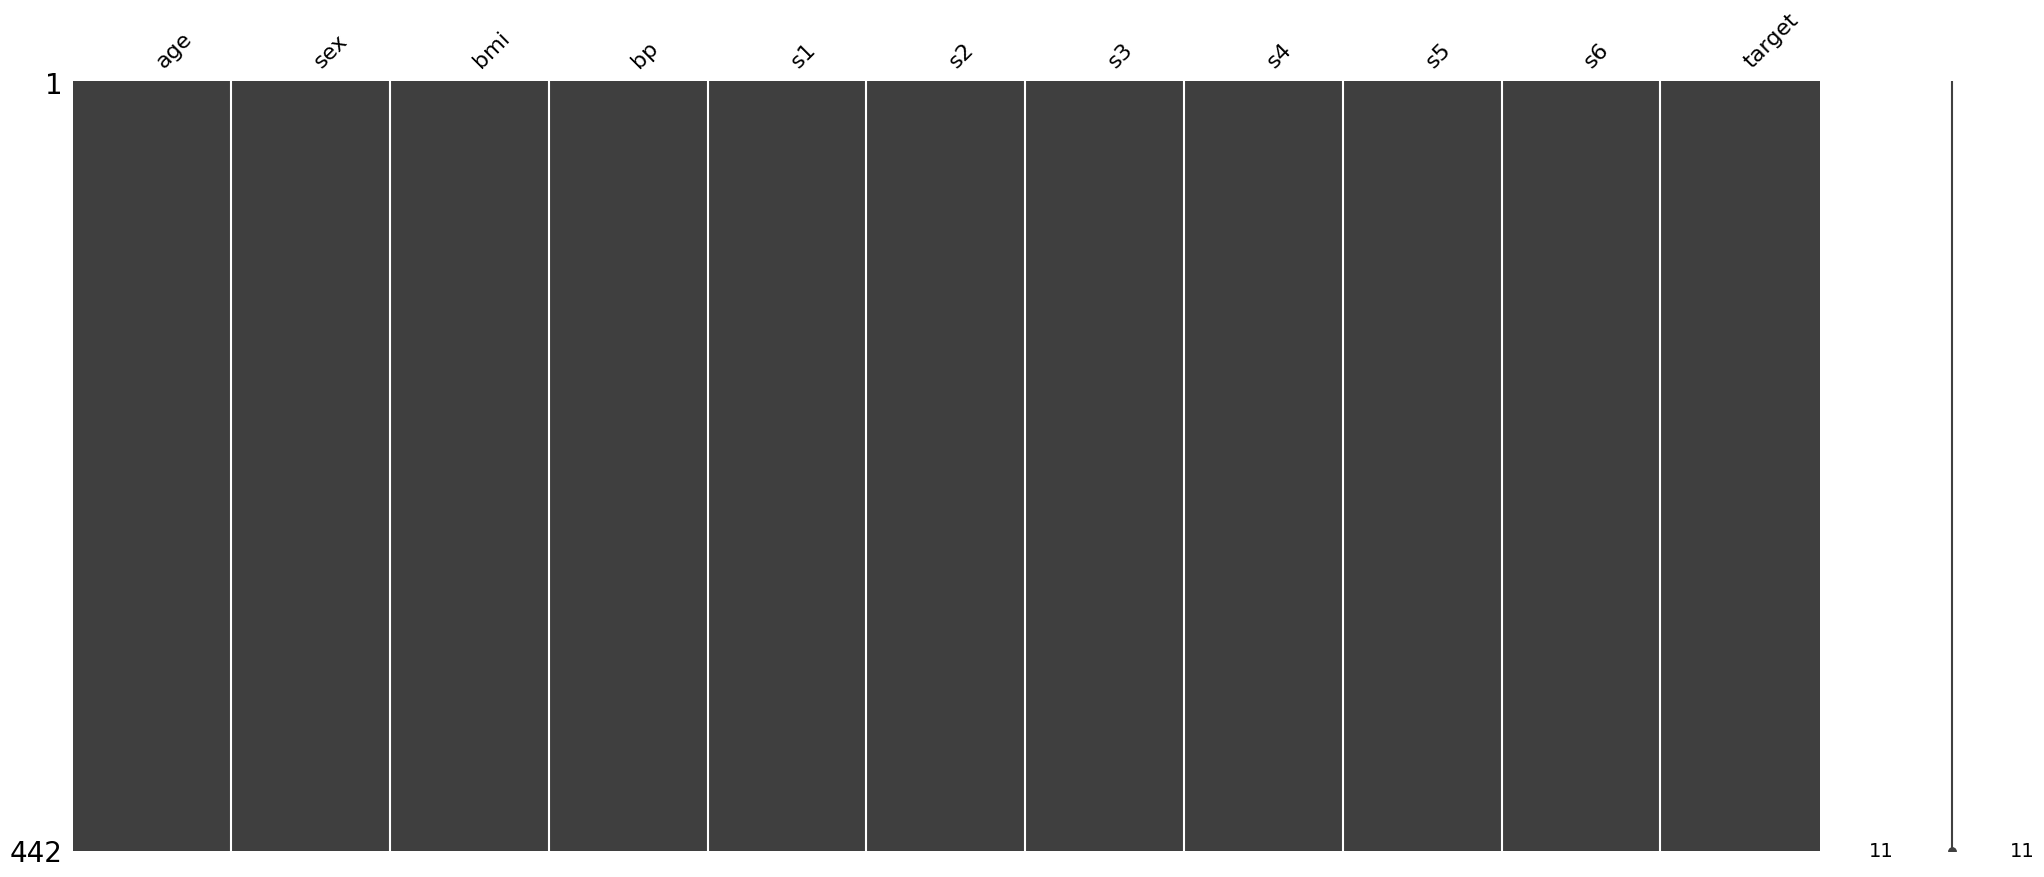

In [3]:
# Visual representation of the data. We can see that there is no NULL value in our data
import missingno as msno
msno.matrix(diabetes["frame"])

In [4]:
print(list(diabetes))

['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module']


In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
diabetes.target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [7]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
diabetes.frame.shape

(442, 11)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(diabetes.data.values, diabetes.target.values, test_size=0.2, random_state= 9004)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
predict1 = regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,predict1)

0.7160900470115171

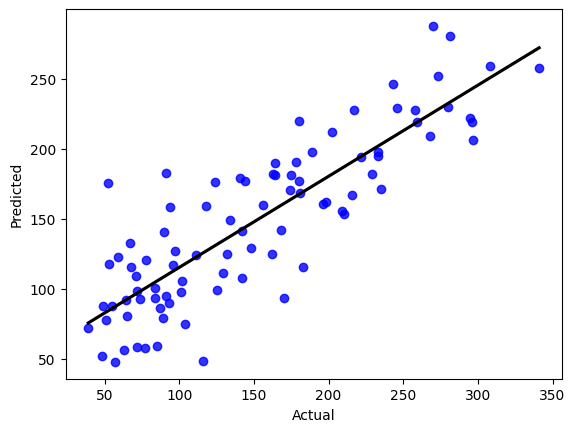

In [12]:
import seaborn as sns
graph = sns.regplot(x= y_test,y=predict1, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "black"});
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show(graph)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly_regressor = PolynomialFeatures(degree=2)

x_poly_train = poly_regressor.fit_transform(X_train)
x_poly_test = poly_regressor.fit_transform(X_test)
poly_lin_regressor = LinearRegression()  
poly_lin_regressor.fit(x_poly_train, y_train)

poly_pred = poly_lin_regressor.predict(x_poly_test)
r2_score(y_test, poly_pred)

0.5806244883348421

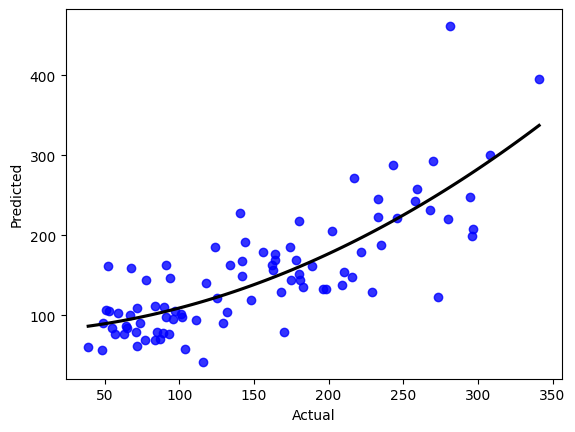

In [14]:
import seaborn as sns
graph = sns.regplot(x=y_test,y=poly_pred,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "black"}, order=2);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show(graph)

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor

gausregressor = GaussianProcessRegressor(alpha=0.01)
gausregressor.fit(X_train,y_train)
gaus_pred =gausregressor.predict(X_test)
r2_score(y_test, gaus_pred)

0.7192985791410261

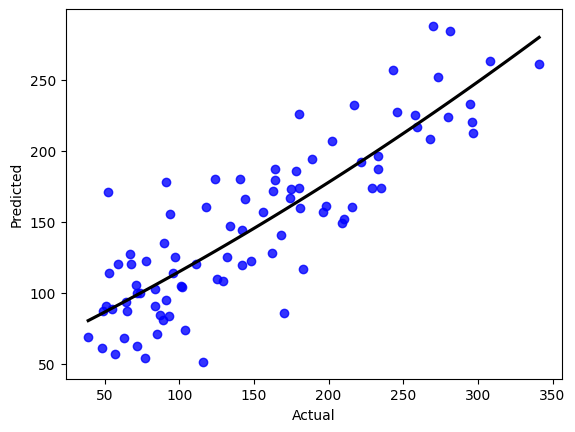

In [16]:
graph = sns.regplot(x=y_test,y=gaus_pred,ci=None,scatter_kws={"color": "blue"}, line_kws={"color": "black"}, order=2);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show(graph)

**Problem 2**

In [17]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer(as_frame=True)
print(type(breast))
breast["frame"]

<class 'sklearn.utils._bunch.Bunch'>


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<AxesSubplot: >

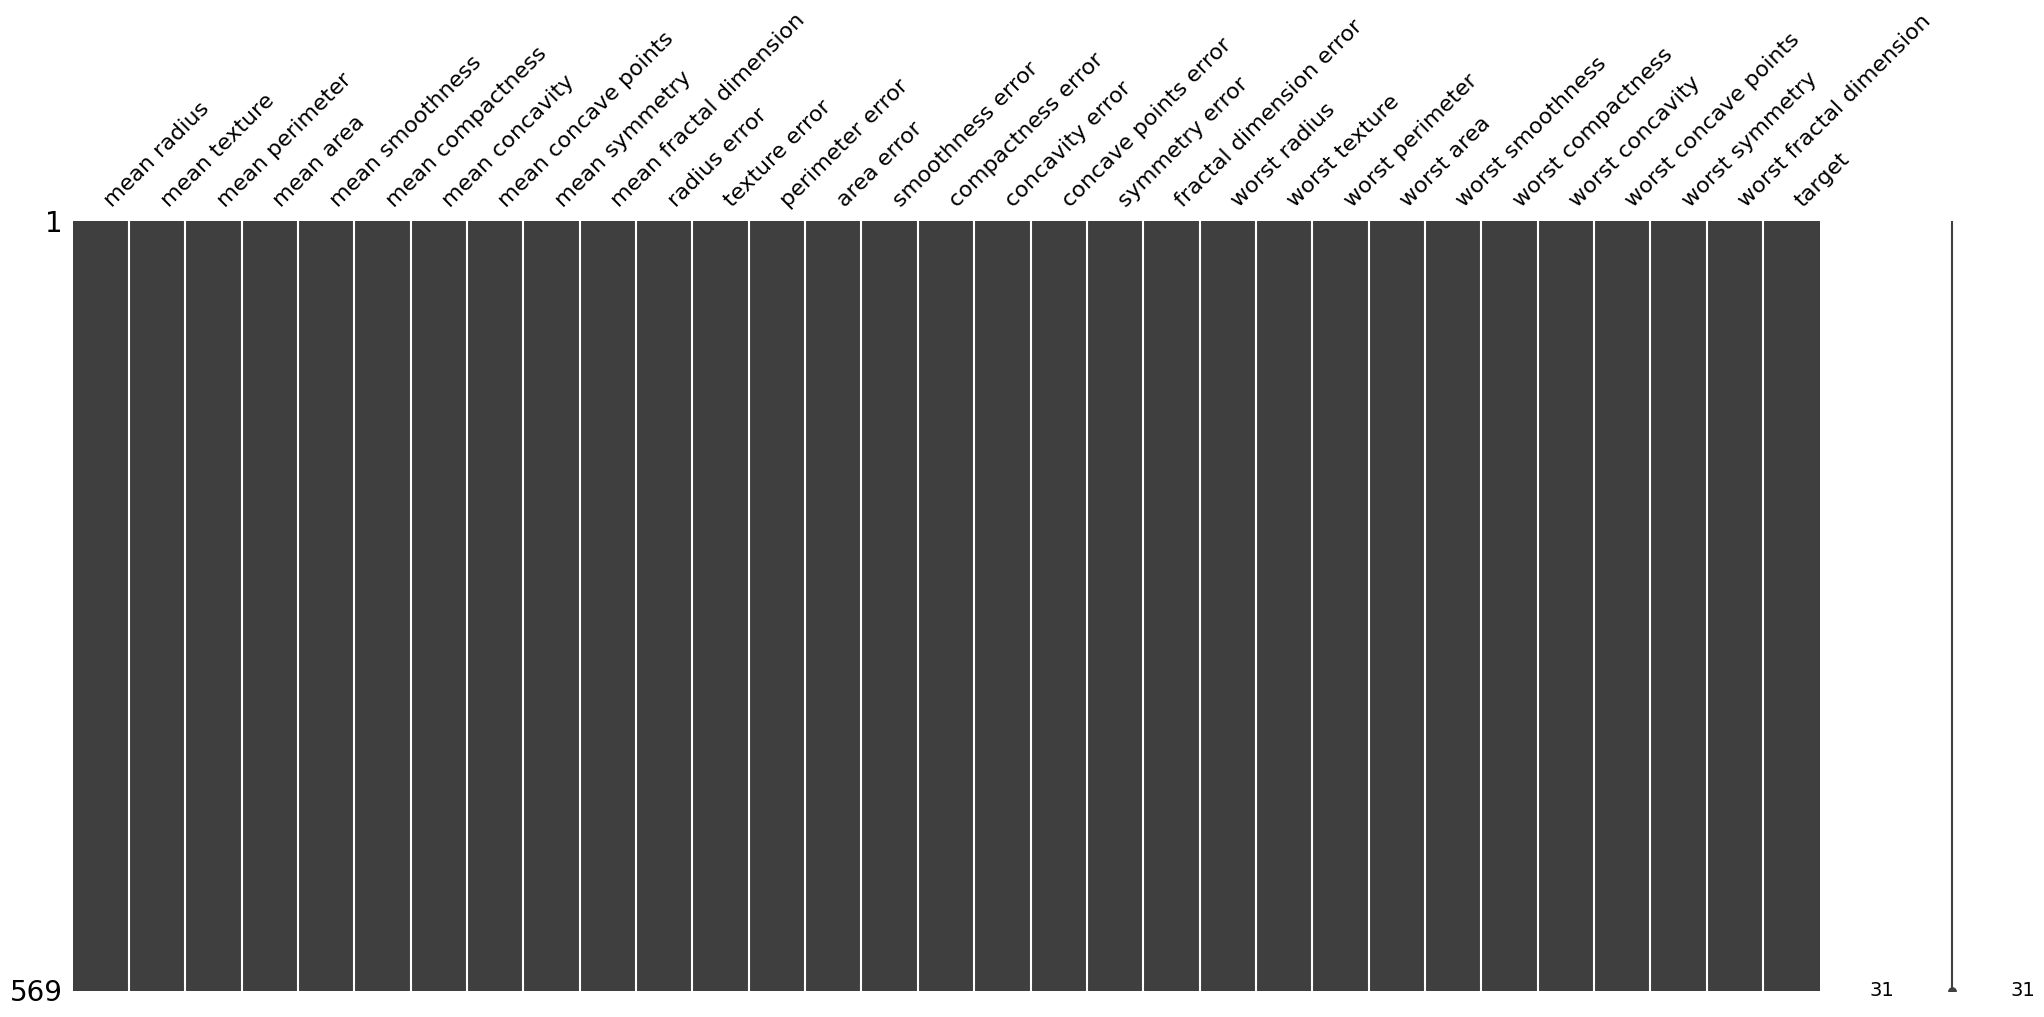

In [18]:
# Visual representation of the data. We can see that there is no NULL value in our data
msno.matrix(breast["frame"])

In [19]:
print(list(breast))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [20]:
breast.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [21]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
breast.data
# As we can see we need feature scaling

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
breast.target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [23]:
print(breast.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [24]:
X_train, X_test, y_train, y_test = train_test_split(breast.data.values, breast.target.values, test_size=0.2, random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knnclf5 = KNeighborsClassifier(n_neighbors=5)
knnclf4 = KNeighborsClassifier(n_neighbors=4)
knnclf3 = KNeighborsClassifier(n_neighbors=3)
knnclf5.fit(X_train, y_train)
knnclf4.fit(X_train, y_train)
knnclf3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
knn_predict5 = knnclf5.predict(X_test)
knn_predict4 = knnclf4.predict(X_test)
knn_predict3 = knnclf3.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix  
confmatrix5 = confusion_matrix(y_test, knn_predict5)
confmatrix4 = confusion_matrix(y_test, knn_predict4)
confmatrix3 = confusion_matrix(y_test, knn_predict3)


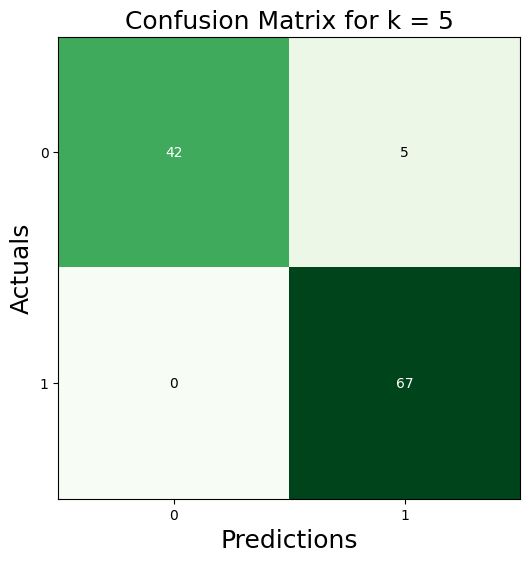

In [29]:
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confmatrix5, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for k = 5', fontsize=18)
plt.show()

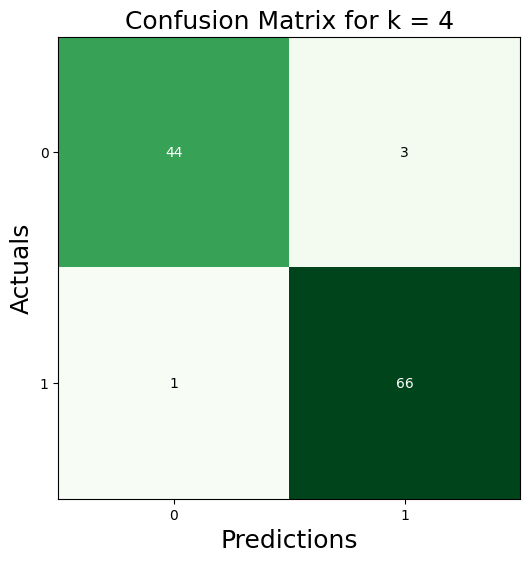

In [30]:
fig, ax = plot_confusion_matrix(conf_mat=confmatrix4, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for k = 4', fontsize=18)
plt.show()

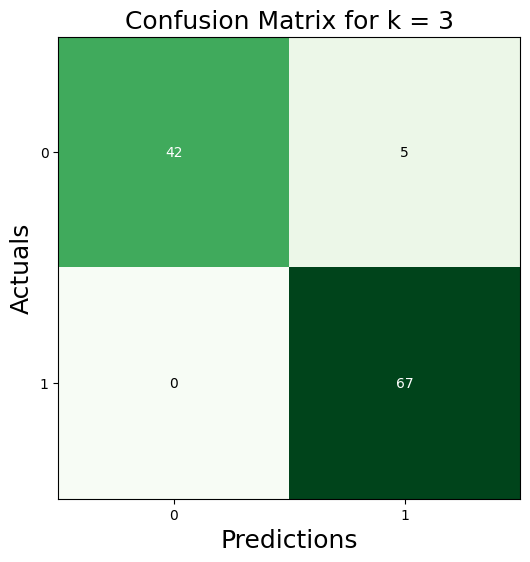

In [31]:
fig, ax = plot_confusion_matrix(conf_mat=confmatrix3, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix for k = 3', fontsize=18)
plt.show()

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, knn_predict5)

0.956140350877193

In [33]:
accuracy_score(y_test, knn_predict4)

0.9649122807017544

In [34]:
accuracy_score(y_test, knn_predict3)

0.956140350877193

In [35]:
from sklearn.metrics import precision_score
precision_score(y_test, knn_predict5)

0.9305555555555556

In [36]:
precision_score(y_test, knn_predict4)

0.9565217391304348

In [37]:
precision_score(y_test, knn_predict3)

0.9305555555555556

In [38]:
from sklearn.metrics import recall_score
recall_score(y_test, knn_predict5)

1.0

In [39]:
recall_score(y_test, knn_predict4)

0.9850746268656716

In [40]:
recall_score(y_test, knn_predict3)

1.0

In [41]:
from sklearn.metrics import f1_score
f1_score(y_test, knn_predict5)

0.9640287769784173

In [42]:
f1_score(y_test, knn_predict4)

0.9705882352941176

In [43]:
f1_score(y_test, knn_predict3)

0.9640287769784173

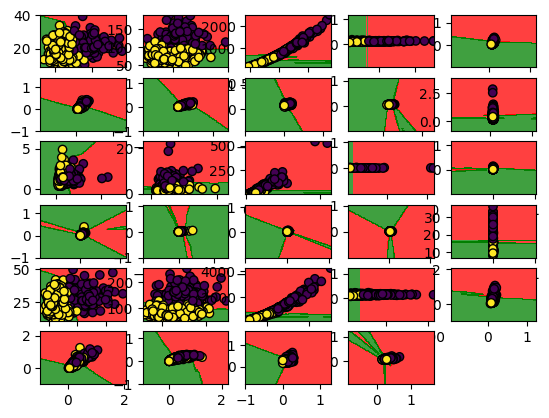

In [44]:
breast = load_breast_cancer()
from matplotlib.colors import ListedColormap
for i in range(29):
    X = breast.data[:,i:i+2]
    y = breast.target
    knn = KNeighborsClassifier(n_neighbors=4).fit(X, y)
    plt.subplot(6, 5, i + 1)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    x_space = np.linspace(x_min, x_max,100)
    y_space = np.linspace(y_min, y_max,100)
    xx, yy = np.meshgrid(x_space,y_space)
    XXYY = np.array([xx.ravel(), yy.ravel()]).T
    
    y_pred = knn.predict(XXYY)
    y_pred = y_pred.reshape(xx.shape) 
    
    #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    plt.contourf(xx, yy, y_pred, alpha = 0.75, cmap = ListedColormap(('red', 'green')))               
    plt.scatter(X[:,0],X[:,1], c = y, edgecolor = "black")
    

Text(0, 0.5, 'mean texture')

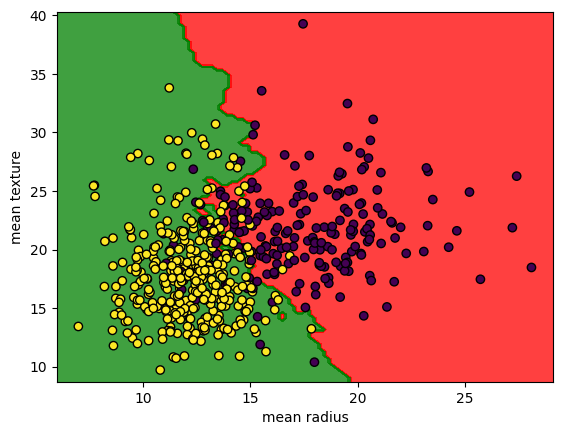

In [45]:
from matplotlib.colors import ListedColormap
x_length = np.linspace(0,40,100)
y_length = np.linspace(0,40,100)
xx, yy = np.meshgrid(x_length,y_length)


X = breast.data[:,0:2]
y = breast.target
knn = KNeighborsClassifier(n_neighbors=5).fit(X, y)
    
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

x_space = np.linspace(x_min, x_max,100)
y_space = np.linspace(y_min, y_max,100)
xx, yy = np.meshgrid(x_space,y_space)
XXYY = np.array([xx.ravel(), yy.ravel()]).T   
y_pred = knn.predict(XXYY)
y_pred = y_pred.reshape(xx.shape)  

plt.contourf(xx, yy, y_pred, alpha = 0.75, cmap = ListedColormap(('red', 'green')))               
plt.scatter(X[:,0],X[:,1], c = y, edgecolor = "black")
plt.xlabel(breast.feature_names[0])
plt.ylabel(breast.feature_names[1])